# Sensor Performance
A notebook to test performance of various lick sensors needed for the physical setup.

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Capacitive sensor
The Arduino `Serial` library sends ASCII-encoded byte data via the `print` function. By sending a new line (`\n`) byte after every value (or using `Serial.println` instead), we can load the data via `np.loadtxt`.

In [2]:
# Load data into numpy array
data_filepath = '../data/test.log'
data = np.loadtxt(data_filepath, dtype=np.float32)

In [3]:
# Verify ASCII encoding/decoding
with open(data_filepath, 'rb') as f:
    print(f.read(20*2))
print(data[:20])

b'0\n0\n0\n0\n5\n4\n2\n4\n4\n1\n4\n4\n1\n4\n4\n4\n7\n4\n4\n4\n'
[0. 0. 0. 0. 5. 4. 2. 4. 4. 1. 4. 4. 1. 4. 4. 4. 7. 4. 4. 4.]


In [4]:
# Find sensor crossing thresholds
thresh = 200
gt = data > thresh
lt = data < thresh
is_lick = np.logical_and(gt, np.roll(lt, 1))
is_lick[0] = False
t_lick = np.argwhere(is_lick)

Text(0, 0.5, 'sensor value (a.u.)')

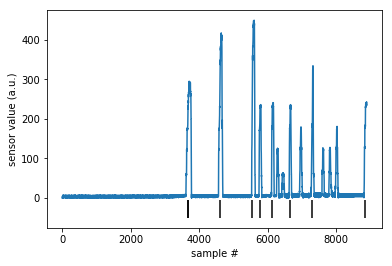

In [12]:
fig, ax = plt.subplots()
ax.plot(data)
ax.vlines(t_lick, ymin=-50.0, ymax=-5.0)
#ax.set_ylim([-0.10*thresh, 3*thresh])
ax.set_xlabel('sample #')
ax.set_ylabel('sensor value (a.u.)')

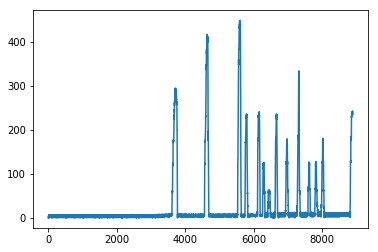

In [6]:
plt.plot(data)